

##H  **Easy Visa Dataset: Preprocessing Overview**

This notebook implements preprocessing steps based on the comprehensive EDA findings and recommendations. We'll follow the evidence-based approach from the EDA report to ensure our preprocessing aligns with the data patterns discovered.

Based on the EDA report, we will:
1. **Feature Engineering** - `Age_of_estab, Annual_wage, wage_per_hour, wage_per_week, wage_per_month, wage_per_year, need_training-has_exp, need_training_no_exp, region_median_wage, wage_vs_region`.

2. **Handle Skewed Variables(Log Tranformation)** - `No_of_employees, year_of_estab, and prevailing_wage`.

3. **Encoding categorical and Ordinal columns** - `binary conding on all the yes and No columns, `
4. **Splitting into target and Features / Feature Selection**
6. **Target Handling** - Class imbalance using SMOTE
7. **Scaling** - RobustScaler
8. **Feature Importance Analysis**

**Key EDA Evidence to Implement**
- **Skewed variables**:  (log-transform)
- **Feature engineering**: `Age_of_estab, wage_per_hour, age_per_year`.


In [1]:
# importing neccessary libraries

# core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# preprocessing libraries
from sklearn.preprocessing import StandardScaler, RobustScaler,LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Statistical libraries
from scipy import stats
from scipy.stats import zscore, skew

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# loading the dataset
df = pd.read_csv("visa_cleaned.csv")
print("Dataset Loaded Successfully")
print("\nFirst 5 rows of the Data")

df.head()



Dataset Loaded Successfully

First 5 rows of the Data


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
# creating a copy for preprocessing
df_processed=df.copy()

### 1. **Feature Engineering**:
- Age_of_estab, 
- Annual_wage(wage_per_hour, wage_per_week, wage_per_month, wage_per_year),
- need_training-has_exp, 
- need_training_no_exp, 
- region_median_wage, 
- wage_vs_region`.


In [4]:
# checking our column names
df_processed.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
print("Feature Engineering based on EDA Recommendation")

# getting the current year
current_yr = datetime.now().year

# engineering age of establishment
df_processed["age_of_estab"]= current_yr - df_processed["yr_of_estab"]
df_processed["age_of_estab"].head()

Feature Engineering based on EDA Recommendation


0     18
1     23
2     17
3    128
4     20
Name: age_of_estab, dtype: int64

In [6]:
# calculating the Annual_wage(wage_per_hour, wage_per_week, wage_per_month, wage_per_year)
unit_map={
    "Hour": 2000,# 40*52
    "Week":52,
    "Month":12,
    "Year": 1
}
df_processed["annual_wage"]=df_processed["prevailing_wage"] * df_processed["unit_of_wage"].map(unit_map)
df_processed["wage_per_hour"] = df_processed["annual_wage"]/2000
df_processed["wage_per_week"] = df_processed["annual_wage"]/52
df_processed["wage_per_month"] = df_processed["annual_wage"]/12

df_processed.head()


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,age_of_estab,annual_wage,wage_per_hour,wage_per_week,wage_per_month
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18,1184405.80,592.202900,22777.034615,98700.483333
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23,83425.65,41.712825,1604.339423,6952.137500
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17,122996.86,61.498430,2365.324231,10249.738333
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128,83434.03,41.717015,1604.500577,6952.835833
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20,149907.39,74.953695,2882.834423,12492.282500


- need_training-has_exp, 
- need_training_no_exp, 


In [7]:
# need training and experience
df_processed["need_training_has_exp"]= ((df_processed["has_job_experience"]== "Y") &(df_processed["requires_job_training"]=="Y")).astype(int)
df_processed.head(5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,age_of_estab,annual_wage,wage_per_hour,wage_per_week,wage_per_month,need_training_has_exp
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18,1184405.80,592.202900,22777.034615,98700.483333,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23,83425.65,41.712825,1604.339423,6952.137500,0
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17,122996.86,61.498430,2365.324231,10249.738333,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128,83434.03,41.717015,1604.500577,6952.835833,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20,149907.39,74.953695,2882.834423,12492.282500,0


In [8]:
# need training and experience
df_processed["need_training_no_exp"]= ((df_processed["has_job_experience"]== "N") &(df_processed["requires_job_training"]=="Y")).astype(int)
df_processed.head(5)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,age_of_estab,annual_wage,wage_per_hour,wage_per_week,wage_per_month,need_training_has_exp,need_training_no_exp
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18,1184405.80,592.202900,22777.034615,98700.483333,0,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23,83425.65,41.712825,1604.339423,6952.137500,0,0
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17,122996.86,61.498430,2365.324231,10249.738333,0,1
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128,83434.03,41.717015,1604.500577,6952.835833,0,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20,149907.39,74.953695,2882.834423,12492.282500,0,0


- region_median_wage, 


In [9]:
# region median wage
df_processed["region_median_wage"] = df_processed.groupby("region_of_employment")["annual_wage"].transform("median")
df_processed.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,age_of_estab,annual_wage,wage_per_hour,wage_per_week,wage_per_month,need_training_has_exp,need_training_no_exp,region_median_wage
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18,1184405.80,592.202900,22777.034615,98700.483333,0,0,73867.56
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23,83425.65,41.712825,1604.339423,6952.137500,0,0,81412.15
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17,122996.86,61.498430,2365.324231,10249.738333,0,1,73867.56
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128,83434.03,41.717015,1604.500577,6952.835833,0,0,73867.56
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20,149907.39,74.953695,2882.834423,12492.282500,0,0,84812.35


- wage_vs_region`.

In [10]:
# - wage_vs_region`
df_processed["wage_vs_region"] = df_processed["annual_wage"]/df_processed["region_median_wage"]
df_processed.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,age_of_estab,annual_wage,wage_per_hour,wage_per_week,wage_per_month,need_training_has_exp,need_training_no_exp,region_median_wage,wage_vs_region
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18,1184405.80,592.202900,22777.034615,98700.483333,0,0,73867.56,16.034181
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23,83425.65,41.712825,1604.339423,6952.137500,0,0,81412.15,1.024732
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17,122996.86,61.498430,2365.324231,10249.738333,0,1,73867.56,1.665100
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128,83434.03,41.717015,1604.500577,6952.835833,0,0,73867.56,1.129508
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20,149907.39,74.953695,2882.834423,12492.282500,0,0,84812.35,1.767518


#### **2. Log-Transform Skewed Variables (EDA Recommendation)**

In [11]:
# Log-transform skewed variables as recommended by EDA
print("LOG-TRANSFORMING SKEWED VARIABLES")
print("EDA identified these variables as right-skewed and recommended log transformation:\n")

skewed_vars = ["annual_wage", "wage_per_hour", "wage_per_week", 
               "wage_per_month", "age_of_estab", "wage_vs_region"]

def handle_skewed_vars(df):
    transformed_cols = []
    for var in skewed_vars:
        if var in df_processed.columns:
            min_val = df_processed[var].min()
            
            # Handle zeros or negatives
            if min_val <= 0:
                df_processed[f'{var}_log'] = np.log1p(df_processed[var])
                print(f" {var}: Applied log1p transformation (min value = {min_val:.3f})")
            else:
                # use log1p for positive values zero
                df_processed[f'{var}_log'] = np.log(df_processed[var])
                print(f"{var}: Applied log transformation (all positive values)")
            
            # Check skewness before and after
            original_skew = skew(df_processed[var].dropna())
            transformed_skew = skew(df_processed[f'{var}_log'].dropna())
            print(f"Original Skewness: {original_skew:.3f}")
            print(f"Transformed Skewness: {transformed_skew:.3f}\n")
            
            transformed_cols.append(f'{var}_log')
        else:
            print(f"{var}: Column not found in dataset.\n")
    
    print(f"\nDataset shape after log transformation: {df_processed.shape}")
    print("New log-transformed columns:", transformed_cols)
    return df



LOG-TRANSFORMING SKEWED VARIABLES
EDA identified these variables as right-skewed and recommended log transformation:



In [12]:
handle_skewed_vars(df_processed)

annual_wage: Applied log transformation (all positive values)
Original Skewness: 9.169
Transformed Skewness: -0.008

wage_per_hour: Applied log transformation (all positive values)
Original Skewness: 9.169
Transformed Skewness: -0.008

wage_per_week: Applied log transformation (all positive values)
Original Skewness: 9.169
Transformed Skewness: -0.008

wage_per_month: Applied log transformation (all positive values)
Original Skewness: 9.169
Transformed Skewness: -0.008

age_of_estab: Applied log transformation (all positive values)
Original Skewness: 2.037
Transformed Skewness: 0.812

wage_vs_region: Applied log transformation (all positive values)
Original Skewness: 9.391
Transformed Skewness: 0.021


Dataset shape after log transformation: (25480, 26)
New log-transformed columns: ['annual_wage_log', 'wage_per_hour_log', 'wage_per_week_log', 'wage_per_month_log', 'age_of_estab_log', 'wage_vs_region_log']


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,...,need_training_has_exp,need_training_no_exp,region_median_wage,wage_vs_region,annual_wage_log,wage_per_hour_log,wage_per_week_log,wage_per_month_log,age_of_estab_log,wage_vs_region_log
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,...,0,0,73867.56,16.034181,13.984752,6.383849,10.033508,11.499845,2.890372,2.774723
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,...,0,0,81412.15,1.024732,11.331711,3.730809,7.380467,8.846804,3.135494,0.024431
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,...,0,1,73867.56,1.665100,11.719914,4.119012,7.768670,9.235007,2.833213,0.509885
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,...,0,0,73867.56,1.129508,11.331812,3.730909,7.380568,8.846905,4.852030,0.121782
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,...,0,0,84812.35,1.767518,11.917773,4.316871,7.966529,9.432866,2.995732,0.569577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,...,1,0,84812.35,0.908978,11.252762,3.651860,7.301518,8.767856,2.833213,-0.095434
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,...,0,0,81412.15,3.429154,12.539593,4.938691,8.588350,10.054687,2.944439,1.232314
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,...,0,0,84812.35,1.724971,11.893407,4.292504,7.942163,9.408500,4.744932,0.545210
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,...,1,0,73867.56,1.166341,11.363901,3.762998,7.412657,8.878994,4.927254,0.153872


### 3. **Encoding categorical and Ordinal columns** - `binary conding on all the yes and No columns, `

In [13]:
encode_columns = ["has_job_experience","requires_job_training","full_time_position",]
for col in encode_columns:
    df_processed[col]= (df_processed[col]== "Y").astype(int)

In [14]:
df_processed["education_of_employee"].unique()

array(['High School', "Master's", "Bachelor's", 'Doctorate'], dtype=object)

In [15]:
label_encoder = LabelEncoder()
ordinal_encoder=OrdinalEncoder(categories=[["High School","Bachelor's","Master's","Doctorate"]])

df_processed["continent"] = label_encoder.fit_transform(df_processed["continent"])
df_processed["case_status"] = label_encoder.fit_transform(df_processed["case_status"])
df_processed["region_of_employment"] = label_encoder.fit_transform(df_processed["region_of_employment"])
df_processed["education_of_employee"]= ordinal_encoder.fit_transform(df_processed[["education_of_employee"]])


In [16]:
df_processed.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,...,need_training_has_exp,need_training_no_exp,region_median_wage,wage_vs_region,annual_wage_log,wage_per_hour_log,wage_per_week_log,wage_per_month_log,age_of_estab_log,wage_vs_region_log
0,1,0.0,0,0,14513,2007,4,592.2029,Hour,1,...,0,0,73867.56,16.034181,13.984752,6.383849,10.033508,11.499845,2.890372,2.774723
1,1,2.0,1,0,2412,2002,2,83425.6500,Year,1,...,0,0,81412.15,1.024732,11.331711,3.730809,7.380467,8.846804,3.135494,0.024431
2,1,1.0,0,1,44444,2008,4,122996.8600,Year,1,...,0,1,73867.56,1.665100,11.719914,4.119012,7.768670,9.235007,2.833213,0.509885
3,1,1.0,0,0,98,1897,4,83434.0300,Year,1,...,0,0,73867.56,1.129508,11.331812,3.730909,7.380568,8.846905,4.852030,0.121782
4,0,2.0,1,0,1082,2005,3,149907.3900,Year,1,...,0,0,84812.35,1.767518,11.917773,4.316871,7.966529,9.432866,2.995732,0.569577


### **4. Splitting into Target/Features/ Feature Selection**

In [17]:
# seperating features and target
y=df_processed["case_status"]
X = df_processed.drop("case_status", axis=1)


In [18]:
# Droppinng the original column befor log transformation and retaining the feature engineered column
dropped_cols = ["annual_wage", "wage_per_hour", "wage_per_week", 
               "wage_per_month", "age_of_estab", "wage_vs_region","unit_of_wage","prevailing_wage"]
X= X.drop(dropped_cols, axis=1)

### **5. Target Class Imbalance Handling(SMOTE)**

In [19]:
# creating a copy before scaling
smote = SMOTE(sampling_strategy="minority")
X,y= smote.fit_resample(X,y)
y.value_counts()

case_status
1    17018
0    17018
Name: count, dtype: int64

In [20]:
X_copy=X.copy()
y_copy= y.copy()

In [21]:
# splitting te data
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(f"Data Split Result")
print(f"Training Set:{X_train.shape}({(X_train.shape[0]/len(X))*100:.2f}%)")
print(f"Testing Set:{X_test.shape}({(X_test.shape[0]/len(X))*100:.2f}%)")

Data Split Result
Training Set:(27228, 17)(80.00%)
Testing Set:(6808, 17)(20.00%)


### **6. Feature Scaling using Robust Scaler**

Apply Robust Scaler as recommended by EDA


In [22]:
print("Feature Scaling (Robust Scaler)")
# instantiating Robust Scaler
scaler = RobustScaler()
# applying scaler to the train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

print("Feature Scaling using RobustScaler Completed")
# checking the scaled data
print(f"Scaled Training Set: {X_train_scaled.median().mean():.4f}")
print(f"Scaled Testing Set: {X_test_scaled.median().mean():.4f}")

Feature Scaling (Robust Scaler)
Feature Scaling using RobustScaler Completed
Scaled Training Set: 0.0000
Scaled Testing Set: -0.0008


### **7. Feature Importance Analysis**

FEATURE IMPORTANCE ANALYSIS
Top 10 features by correlation with Loan_Status:
 1. need_training_has_exp: 0.023
 2. requires_job_training: 0.017
 3. age_of_estab_log: 0.007
 4. full_time_position: 0.007
 5. yr_of_estab: 0.006
 6. education_of_employee: 0.004
 7. annual_wage_log: 0.004
 8. wage_per_month_log: 0.004
 9. wage_per_hour_log: 0.004
10. wage_per_week_log: 0.004
Engineered features in top 10: ['annual_wage_log', 'wage_per_hour_log', 'wage_per_week_log', 'wage_per_month_log', 'age_of_estab_log']


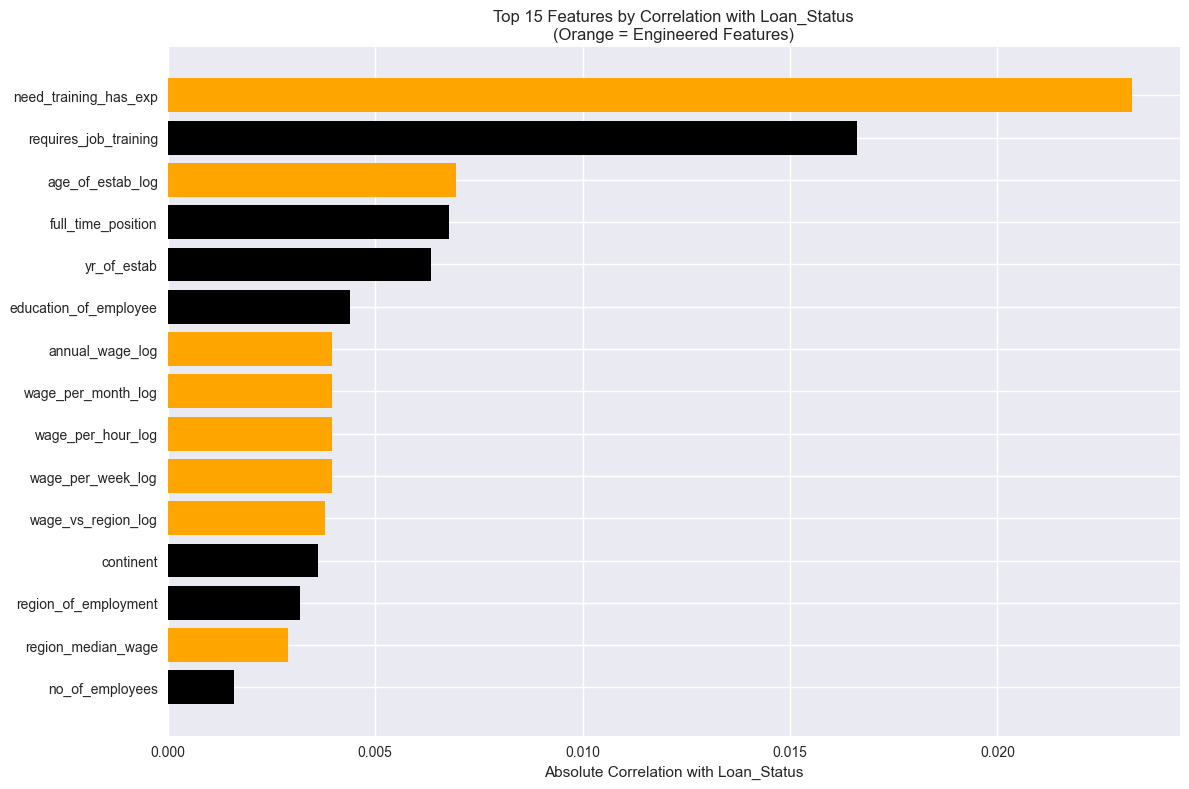


✓ Feature importance analysis completed
✓ 5 engineered features in top 10


In [23]:
# Feature importance analysis to validate EDA-based engineering
print("FEATURE IMPORTANCE ANALYSIS")

# calculate correlation with target for all features
feature_correlations = X_train_scaled.corrwith(y_train).abs().sort_values(ascending=False)

print("Top 10 features by correlation with Loan_Status:")
for i, (feature, corr) in enumerate(feature_correlations.head(10).items(),1):
    print(f"{i:2d}. {feature}: {corr:.3f}")
    
#checking  if engineered features are among to features
engineered_features =[col for col in X_train_scaled.columns if any(keyword in col.lower() for keyword in["log","total","year"])]
print(f"Engineered features in top 10: {[f for f in engineered_features if f in feature_correlations.head(10).index]}")

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_correlations.head(15)
colors = ['orange'if any(keyword in f.lower() for keyword in ["log","wage","need"]) else 'black' for f in top_features.index]

plt.barh(range(len(top_features)), top_features.values, color=colors)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Absolute Correlation with Loan_Status')
plt.title('Top 15 Features by Correlation with Loan_Status\n(Orange = Engineered Features)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\n✓ Feature importance analysis completed")
print(f"✓ {len([f for f in engineered_features if f in feature_correlations.head(10).index])} engineered features in top 10")



#### **8. Save Preprocessed Data**

In [24]:
print("SAVING PREPROCESSED DATA ")

# Save scaled data to csv
X_train_scaled.to_csv("X_train_scaled.csv", index=True)
X_test_scaled.to_csv("X_test_scaled.csv", index=True)

#Save target variables
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

#Save preprocessing objects
import joblib
joblib.dump(scaler, "robust_scaler.pkl")
joblib.dump(X.columns.tolist(), "selected_features.pkl")

#Save feature importance
feature_importance_df = pd.DataFrame({
    'feature': feature_correlations.index,
    'correlation': feature_correlations.values
})
feature_importance_df.to_csv('feature_importance.csv', index=False)

#Save preprocessing summary
preprocessing_summary = {
    'original_shape': df.shape,
    'final_shape': df_processed.shape,
    'selected_features': X.columns.tolist(),
    'engineered_features': engineered_features,
    'train_samples': X_train_scaled.shape[0],
    'test_samples': X_test_scaled.shape[0],
    'scaling_method': 'RobustScaler',
    'outlier_treatment': 'Log Transformation',
    'log_transformed': [
        "annual_wage", 
        "wage_per_hour", 
        "wage_per_week",
        "wage_per_month", 
        "age_of_estab", 
        "wage_vs_region"
    ]
}

import json
with open('preprocessing_summary.json', 'w') as f:
    json.dump(preprocessing_summary, f, indent=2)

print("- Preprocessed data saved successfully!")
print("\nFiles created:")
print("- X_train_scaled.csv, X_test_scaled.csv")
print("- y_train.csv, y_test.csv")
print("- scaler.pkl, selected_features.pkl")
print("- feature_importance.csv, preprocessing_summary.json")


SAVING PREPROCESSED DATA 
- Preprocessed data saved successfully!

Files created:
- X_train_scaled.csv, X_test_scaled.csv
- y_train.csv, y_test.csv
- scaler.pkl, selected_features.pkl
- feature_importance.csv, preprocessing_summary.json


In [26]:
# Final preprocessing summary
print(".....PREPROCESSING SUMMARY BASED ON EDA INSIGHTS.....")
print(f"Original dataset shape: {df.shape}")
print(f"Final processed dataset shape: {df_processed.shape}")
print(f"Selected features: {len(X)}")
print(f"Training samples: {X_train_scaled.shape[0]}")
print(f"Test samples: {X_test_scaled.shape[0]}")

print("\n.....PREPROCESSING STEPS COMPLETED (EDA-BASED).....")
print("> Data quality assessment (no missing values, no duplicated values)")
print("> Log-transformation of skewed variables ('annual_wage', 'wage_per_hour', 'wage_per_week', 'wage_per_month', 'age_of_estab', 'wage_vs_region')")
print("> Feature engineering based on EDA recommendations:")
print("- age_of_estab, ")
print("- annual_wage(wage_per_hour, wage_per_week, wage_per_month, wage_per_year)")
print("- need_training-has_exp")
print("- need_training_no_exp")
print("- region_median_wage")
print("- wage_vs_region")
print("> Feature selection performed (EDA-guided): ('annual_wage', 'wage_per_hour', 'wage_per_week', 'wage_per_month', 'age_of_estab', 'wage_vs_region')")
print("> SMOTE applied (to handle class imbalance)")
print("> RobustScaler applied (per EDA recommendation)")
print("> Feature importance analysis validated selected and engineered features")
print("> Data export completed (datasets ready for modeling)")

print("\n.....EDA EVIDENCE IMPLEMENTED.....")
print("> All identified skewed variables were log-transformed as recommended")
print("> Engineered features have been successfully added to the dataset")

print(f"\nPreprocessing completed successfully")
print(".....Ready for modeling phase with EDA-informed preprocessing.....")


.....PREPROCESSING SUMMARY BASED ON EDA INSIGHTS.....
Original dataset shape: (25480, 11)
Final processed dataset shape: (25480, 26)
Selected features: 34036
Training samples: 27228
Test samples: 6808

.....PREPROCESSING STEPS COMPLETED (EDA-BASED).....
> Data quality assessment (no missing values, no duplicated values)
> Log-transformation of skewed variables ('annual_wage', 'wage_per_hour', 'wage_per_week', 'wage_per_month', 'age_of_estab', 'wage_vs_region')
> Feature engineering based on EDA recommendations:
- age_of_estab, 
- annual_wage(wage_per_hour, wage_per_week, wage_per_month, wage_per_year)
- need_training-has_exp
- need_training_no_exp
- region_median_wage
- wage_vs_region
> Feature selection performed (EDA-guided): ('annual_wage', 'wage_per_hour', 'wage_per_week', 'wage_per_month', 'age_of_estab', 'wage_vs_region')
> SMOTE applied (to handle class imbalance)
> RobustScaler applied (per EDA recommendation)
> Feature importance analysis validated selected and engineered feat